In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.text import *

In [0]:
!unzip Data.zip

In [0]:
path = '/content/Data'
data_lm = (TextList.from_folder(path)
          .split_by_rand_pct(valid_pct=0.1)
          .label_for_lm()
          .databunch())

In [5]:
data_lm.show_batch()

idx,text
0,"dcb relacionada no xxmaj anexo xxup ii , da lista completa publicada na xxmaj resolução xxup rdc xxmaj nº. 64 de 28 de dezembro de 2012 ( xxup dou de 03 / 01 / 2013 ) . xxbos xxmaj art 1º xxmaj ficam incluídas as xxup dcb relacionadas no xxmaj anexo i , à lista de xxup dcb aprovada pela xxmaj resolução da xxmaj diretoria xxmaj colegiada – xxup rdc"
1,"o produto é utilizado em desacordo com a finalidade de uso declarada pelo fabricante , instruções e advertências apresentadas na rotulagem e instruções de uso do produto e não xxunk evento adverso grave ; e \n § 1º a condição descrita no inciso i deste artigo não se aplica em caso ocorrência de evento adverso em decorrência da não - conformidade do produto ; \n § 2º xxmaj"
2,"ou o xxunk nos países listados no item 2.1.1 do anexo da xxmaj resolução xxup rdc nº 185 , de 2006 , livre dos impostos e tributos . \n xxup iii - xxmaj número potencial de pacientes : número estimado de pacientes que xxunk serão xxunk pelo produto ; \n xxup iv – xxmaj margem de distribuição nacional : percentual ou valor recebido pela empresa distribuidora para prestar"
3,"15 desta xxmaj resolução . \n xxup capítulo xxup ii \n xxup do xxup regulamento xxup técnico \n xxmaj seção i \n xxmaj princípios xxmaj gerais \n xxmaj art . 8º xxmaj os fabricantes de luvas cirúrgicas e luvas para procedimentos não cirúrgicos de borracha natural , de borracha sintética , de mistura de borrachas natural e sintética e de policloreto de vinila devem cumprir"
4,"as famílias possíveis . xxbos xxmaj art 1º xxmaj esta xxmaj resolução altera as xxmaj resoluções da xxmaj diretoria xxmaj colegiada – rdcs 36 e 40 , de 26 de agosto de 2015 , e tem como objetivo definir os requisitos do regime de xxmaj notificação para o controle sanitário dos dispositivos médicos de classe de risco i , dispensados de registro na forma do § 1º do art ."


In [0]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.5, pretrained=False, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


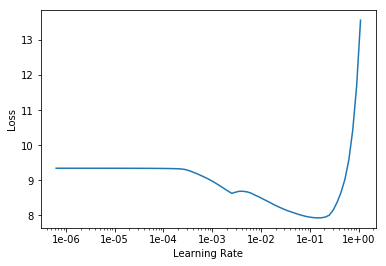

In [12]:
learn_lm.lr_find()
learn_lm.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,4.278200,3.999981,0.318601,02:07
1,3.205045,3.384561,0.366316,02:08
2,3.194271,3.309514,0.368431,02:07
3,2.987065,3.234328,0.378561,02:07
4,2.800100,3.114183,0.391008,02:06
5,2.623811,2.979155,0.410321,02:06
6,2.493961,2.877775,0.423927,02:06
7,2.307024,2.790038,0.436682,02:06
8,2.200243,2.754413,0.445748,02:06
9,2.117338,2.751349,0.446864,02:06


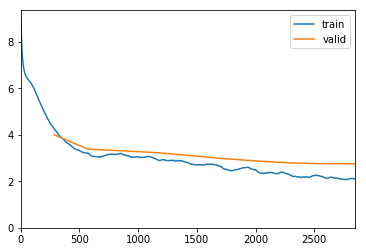

In [13]:
learn_lm.fit_one_cycle(10,2e-2,moms=(0.8,0.7))

In [0]:
#learn_lm.save('learn_lm')
learn_lm.save_encoder('enc')

In [15]:
print(learn_lm.predict('Art. 1º Esta resolução visa',n_words=200,temperature=0.7))

Art. 1º Esta resolução visa o uso de produtos de higiene pessoal , cosméticos e perfumes , nos termos dos anexos desta Resolução . 
  Art . 2º Esta Resolução se aplica aos produtos de higiene pessoal , cosméticos e perfumes de Grau 1 e Grau 2 , fabricados no território nacional , no País , no âmbito do Sistema Brasileiro de Prevenção da Qualidade da Esterilidade . 
  Art . 10 As empresas detentoras de registro de produtos listados no Anexo IV da presente Resolução terão o prazo de 180 ( cento e oitenta ) dias contados a partir da data de sua publicação para promover as adequações necessárias . 
  Art . 12 . As empresas que exercem Autorização Especial , Autorização de Funcionamento ( AFE ) e Autorização Especial ( AE ) , ficam estabelecidos no sistema informatizado das empresas registrantes por solicitação de registro , que serão objeto de fiscalização , , no prazo de até 60 ( sessenta ) dias a partir da data de sua publicação . 
  Art . 10


In [0]:
data_lm.save('data_lm')

In [0]:
!rm -r /content/Data

In [0]:
!unzip Data_1.zip

In [0]:
path = '/content/Data'
data_clas = (TextList.from_folder(path,vocab=data_lm.train_ds.vocab)
          .split_by_rand_pct(valid_pct=0.2)
          .label_from_folder()
          .databunch())

In [25]:
data_clas.show_batch()

text,target
"xxbos xxmaj art 1º xxmaj aprovar e xxunk o xxmaj regimento xxmaj interno da xxmaj agência xxmaj nacional de xxmaj vigilância xxmaj sanitária , na forma do xxmaj anexo i desta xxmaj resolução . \n xxmaj art . 2º xxmaj alterar os quantitativos e a distribuição dos cargos em comissão previstos no xxmaj anexo i da xxmaj lei nº xxunk , de 18 de julho de 2000 , com",gestão interna
"xxbos xxmaj art 1º xxmaj esta resolução possui o objetivo de estabelecer os requisitos mínimos a serem seguidos na fabricação de medicamentos para padronizar a verificação do cumprimento das xxmaj boas xxmaj práticas de xxmaj fabricação de xxmaj medicamentos ( xxup bpf ) de uso humano durante as inspeções sanitárias . \n § 1º xxmaj fica xxunk a xxmaj resolução xxup gmc n ° 15 / 09 - """,medicamentos
"xxbos xxmaj art 1 ° xxmaj ficam estabelecidas as xxmaj boas xxmaj práticas em xxmaj células xxmaj humanas para xxmaj uso xxmaj terapêutico e pesquisa clínica , nos termos desta xxmaj resolução . \n xxup capítulo i \n xxup das xxup disposições xxup iniciais \n xxmaj seção i \n xxmaj objetivo \n xxmaj art . 2 ° xxmaj ficam padronizadas as xxmaj boas xxmaj práticas","sangue, tecidos, células e órgãos"
xxbos xxmaj art 1º xxmaj os estabelecimentos fabricantes de insumos farmacêuticos \n ativos devem cumprir as diretrizes estabelecidas na presente \n xxmaj resolução . \n xxmaj art . 2 ° xxmaj para os efeitos desta xxmaj resolução são adotadas as \n seguintes definições : \n i - água - mãe : líquido residual que permanece após a cristalização \n ou processo de separação .,insumos farmacêuticos
"xxbos xxmaj art 1º xxmaj fica aprovado o regulamento técnico que estabelece os requisitos mínimos para o registro , a renovação de registro , as mudanças pós - registro e a notificação de medicamentos dinamizados industrializados , nos termos desta xxmaj resolução . \n xxup capítulo i \n xxup das xxup disposições xxup iniciais \n xxmaj seção i \n xxmaj objetivo \n xxmaj art .",medicamentos


In [0]:
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, callback_fns=ShowGraph, pretrained=False)
learn_clas.load_encoder('enc')

In [29]:
learn_clas.lr_find()
learn_clas.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

epoch,train_loss,valid_loss,accuracy,time
0,2.700760,2.746577,0.291908,01:53
1,2.392759,2.396252,0.462428,01:54
2,2.061625,1.920777,0.433526,01:55
3,1.769887,2.688965,0.349711,01:53
4,1.534844,2.185816,0.372832,01:53
5,1.352027,1.685840,0.485549,01:52
6,1.192973,1.651921,0.523121,01:53
7,1.052716,2.308045,0.491329,01:53
8,0.921397,1.578255,0.572254,01:52
9,0.829006,2.088985,0.554913,01:53


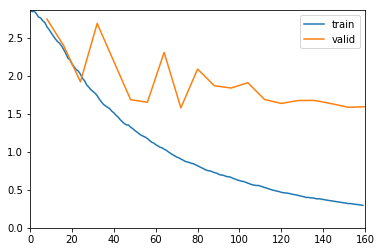

Better model found at epoch 0 with accuracy value: 0.29190751910209656.
Better model found at epoch 1 with accuracy value: 0.4624277353286743.
Better model found at epoch 5 with accuracy value: 0.48554912209510803.
Better model found at epoch 6 with accuracy value: 0.5231214165687561.
Better model found at epoch 8 with accuracy value: 0.5722543597221375.
Better model found at epoch 10 with accuracy value: 0.5838150382041931.
Better model found at epoch 13 with accuracy value: 0.6069363951683044.
Better model found at epoch 14 with accuracy value: 0.6358381509780884.


In [0]:
learn_clas.fit_one_cycle(20, 4e-2 , moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_clas, every='improvement', monitor='accuracy', name='learn_clas')])

In [0]:
interp = ClassificationInterpretation.from_learner(learn_clas)

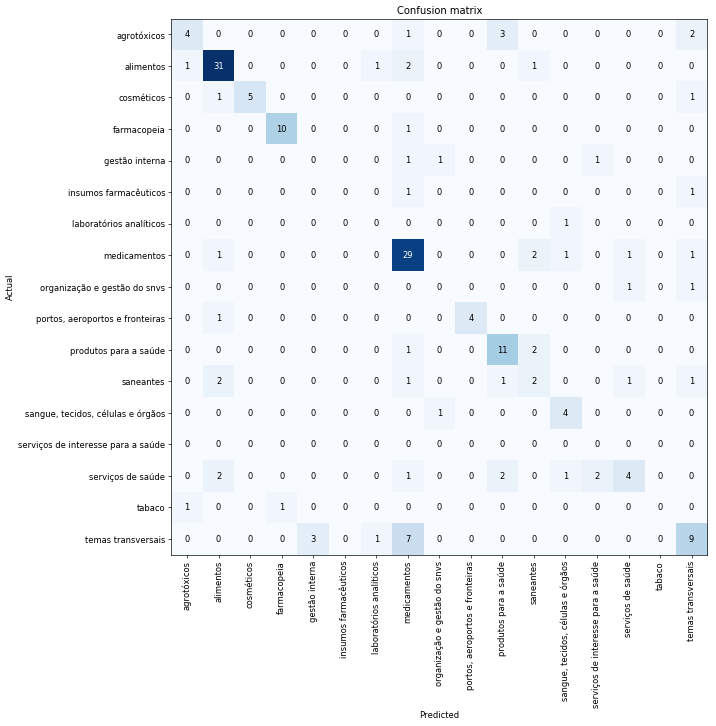

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)